# Lecture 07: Generating a Ragone Plot
---
## Ragone Plot Example
In this example, we create a series of ragone plots, altering the porosity of both the anode and cathode to see what the effect is on specifc energy and specifc power.

We are not balancing the cell in anyway, so do not interperet these are optmized ratios.



### Imports

In [1]:
import sys
sys.path.append("/pithy/code")
from pithy import *
import dualfoil
%matplotlib inline

### Set up dualfoil object

In [2]:
#instantiate simulator
df = dualfoil.dualfoil("user")

### Sweep a Ragone Plot
Sweep over porosity and then currents.
This will take a while to run (the first time. after the the results should be cached)

In [3]:
#Let's Make A Ragone Plot

ragone = {} #dictionary to save results
for porosity in [.1,.15,.2,.25,.3]: #sweep the porosity
    df.parts['ep1'] = porosity 
    df.parts['ep3'] = porosity
    ses = []
    sps = []
    ragone[porosity] = {'ses':None,'sps':None}
    for i in logspace(0,3,10): #sweep the current density
        df.clear_cycles()
        df.set_current(i,1000000000,minv=3.3) #discharge at i A/m^2 for until we hit cutoff minv
        df.writeOut()
        df.runDualFoil(debug=False,output=True,force=False) #don't force dualfoil to run, show realtime output
        data = df.readOutput() #output of ivt in dataframe format
        ses.append(data['se'][0]) #append SE
        sps.append(data['sp'][0]) #append SP
    ragone[porosity] = {'ses':ses,'sps':sps}


### Plot Ragone Behavior

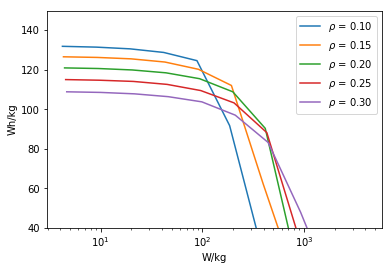

In [4]:
#plot stuff
k = ragone.keys()
k.sort()
for i in k:
    se = ragone[i]['ses']
    sp = ragone[i]['sps']
    plot(sp,se,label="$\\rho$ = %.2f" % i)
semilogx()
legend()
ylim(40,150)
xlabel("W/kg")
ylabel("Wh/kg")